## Lab 4. Building a Neural Network in PyTorch

Jay Urbain, PhD

12/30/2022, 1/4/2023


Lab 4: In This assignment we will be building nueral networks in PyTorch to classify images in the `FashionMNIST` dataset. 

The assignments consiste of three parts. Part 1 is actually done for you and is meant as a tutorial. Make sure you read and execute the notebook. In part 2, you will create a basic convolutional neural network as described below. In part 3, you are encouraged to improve the performance of the network. Do a little thinking and research. Good luck!

TODO: Part 1: Create a neural network model   
TODO: Part 2: Create a convolutional neural network model   
TODO: Part 3: Improve your convolutional neural network model   

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import warnings
import os.path
import torchviz
import seaborn as sns
import matplotlib.pyplot as plt
import math
sns.set(rc={"figure.figsize":(16, 8)})

PyTorch offers domain-specific libraries such as `TorchText`, `TorchVision`, and `TorchAudio`, all of which include datasets. 

We will be using the `FashionMNIST` dataset from `1TorchVision`. 

https://www.kaggle.com/code/pavansanagapati/a-simple-cnn-model-beginner-guide/data

Code for processing data samples can get messy and hard to maintain. We  want our dataset code to be decoupled from our model training code for better readability and modularity. 

PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

If you have a custom data set you'll need to create an instance of `torch.utils.data.Dataset` for your files.

Note: We're only performing one basic transformation, `ToTensor` to transform are numpy ndarray's into a PyTorch tensor.

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Examine the dataset.

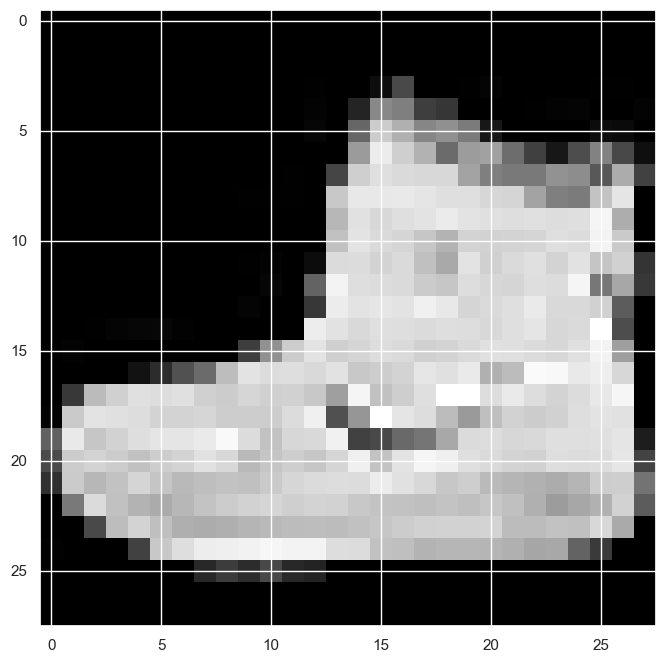

(28, 28)

In [3]:
import matplotlib.pyplot as plt

img_ = training_data[0][0].numpy().reshape(28, 28)
plt.imshow(img_, cmap='gray')
plt.show()
img_.shape

Pass the Dataset as an argument to `DataLoader`. This wraps an iterable over the dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Another benefit is the ability to perform data manipulation. But don't over do it since you want data loading to be efficient.

Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [4]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


#### Creating Models

To define a neural network in PyTorch, create a class that inherits from nn.Module. 

Define the layers of the network in the `__init__` function and specify how data will pass through the network in the `forward` function. To accelerate operations in the neural network, move it to the GPU if available.

## TODO: Part 1: Create a neural network model 

In [5]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## TODO: Part 2: Create a convolutional neural network model 

First review, the following references:

Conv2d  
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

BatchNorm2d  
https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html

ReLU  
https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html 

MaxPool2d  
https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

Linear  
https://pytorch.org/docs/stable/generated/torch.nn.Linear.html   

Second, complete the following ConvNet class.

In [6]:
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

class ConvNet(nn.Module):   
    def __init__(self):
        super(ConvNet, self).__init__()

        self.cnn_layers = nn.Sequential(
            # Defining a 2D 3x3 convolution layer using Conv2d. Use a stride of 1 and padding of 1.
            # input channels should be 1, output channels should be 4.
            nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1), # input of size a, in_channels, c, d has output of size a, out_channels, c, d
            
            # Perform batch normilation
            # nn.BatchNorm2d(num_features=(784 * 512 + 512 * 512 + 512 * 10)),
            nn.BatchNorm2d(num_features=4), # input matches output
            
            # Apply the ReLU non-linear activation function
            nn.ReLU(inplace=True), # input matches output
            
            # # Reduce the spatial dimensionality by using max pooling with size of 2 and stride of 2.
            # # output size is input with last two dims divided by 2 and (kernel_size - stride) subracted
            nn.MaxPool2d(kernel_size=2, stride=2), # input of size a, b, c, d has output of size a, b, c/2, d/2
            
            # # Define another 2D convolution layer
            # # Be careful to define the correct number of input channels into your convolution layer
            # # based on the above formulas, MaxPool2d only affects c and d and the first conv layer affects b. Therefore the input channels of this conv is the output channels of the first conv layer.
            # # nn.Conv2d(in_channels=4, out_channels=196, kernel_size=3, stride=1, padding=1)
            nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, stride=1, padding=1),
            
            # Perform batch normilation
            # nn.BatchNorm2d(num_features=(784 * 512 + 512 * 512 + 512 * 10)),
            nn.BatchNorm2d(num_features=4), # input matches output
            
            # Apply the ReLU non-linear activation function
            nn.ReLU(inplace=True), # input matches output
            
            # # Reduce the spatial dimensionality by using max pooling with size of 2 and stride of 2.
            # # output size is input with last two dims divided by 2 and (kernel_size - stride) subracted
            nn.MaxPool2d(kernel_size=2, stride=2), # input of size a, b, c, d has output of size a, b, c/2, d/2
        )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x
    
model2 = ConvNet().to(device)
print(model2)

ConvNet(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


In [7]:
# pool of square window of size=2, stride=2
# input of size a, b, c, d has output of size a, b, c/2, d/2
m = nn.MaxPool2d(2, stride=2)
input = torch.randn(20, 16, 8, 32)
output = m(input)
output.shape

torch.Size([20, 16, 4, 16])

In [8]:
# With square kernels and equal stride
# input of size a, in_channels, c, d has output of size a, out_channels, c, d
m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=3, stride=1, padding=1)
input = torch.randn(20, 16, 50, 100)
output = m(input)
output.shape

torch.Size([20, 33, 50, 100])

In [9]:
# With square kernels and equal stride
# input of size a, in_channels, c, d has output of size a, out_channels, c, d
m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=3, stride=2, padding=1)
input = torch.randn(20, 16, 50, 100)
output = m(input)
output.shape

torch.Size([20, 33, 25, 50])

In [10]:
# With Learnable Parameters
# input matches output
m = nn.BatchNorm2d(100)
input = torch.randn(20, 100, 35, 45)
output = m(input)
output.shape

torch.Size([20, 100, 35, 45])

In [11]:
print(training_data.targets.shape)
print(training_data.data.shape)
print(test_data.targets.shape)
print(test_data.data.shape)

torch.Size([60000])
torch.Size([60000, 28, 28])
torch.Size([10000])
torch.Size([10000, 28, 28])


## TODO: Part 3: Improve your convolutional neural network model 

Can you improve the performance of this convolutional neural network and right trash talk your Professor?


In [12]:
# your super duper convnet here

# TODO check all of the values
class ConvNet(nn.Module):   
    def __init__(self):
        super(ConvNet, self).__init__()

        self.cnn_layers = nn.Sequential(
            # Defining a 2D 3x3 convolution layer using Conv2d. Use a stride of 1 and padding of 1.
            # input channels should be 1, output channels should be 4.
            nn.Conv2d(in_channels=1, out_channels=4, kernel_size=4, stride=1, padding=1), # input of size a, in_channels, c, d has output of size a, out_channels, c, d
            
            # Perform batch normilation
            # nn.BatchNorm2d(num_features=(784 * 512 + 512 * 512 + 512 * 10)),
            nn.BatchNorm2d(num_features=4), # input matches output
            
            # Apply the ReLU non-linear activation function
            nn.ReLU(inplace=True), # input matches output
            
            # # Reduce the spatial dimensionality by using max pooling with size of 2 and stride of 2.
            # # output size is input with last two dims divided by 2 and (kernel_size - stride) subracted
            nn.MaxPool2d(kernel_size=4, stride=2), # input of size a, b, c, d has output of size a, b, c/2, d/2
            
            # # # Define another 2D convolution layer
            # # # Be careful to define the correct number of input channels into your convolution layer
            # # # based on the above formulas, MaxPool2d only affects c and d and the first conv layer affects b. Therefore the input channels of this conv is the output channels of the first conv layer.
            # # # nn.Conv2d(in_channels=4, out_channels=196, kernel_size=3, stride=1, padding=1)
            nn.Conv2d(in_channels=4, out_channels=1, kernel_size=4, stride=1, padding=1)
        )

        self.linear_layers = Sequential(
            # Linear(4 * 7 * 7, 10)
            Linear(121, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x
    
model3 = ConvNet().to(device)
print(model3)

ConvNet(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 1, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=121, out_features=10, bias=True)
  )
)


#### Optimizing the Model Parameters

To train a model, define a loss function and an optimizer. Note: We are just using cross entropy loss and stochastic gradient descent as discussed in class.

In [13]:
model = model2
loss_fn = nn.CrossEntropyLoss() # define loss
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) # define optimizer

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.


In [14]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X) # use model to make a prediction
        loss = loss_fn(pred, y) # measure loss with respect to ground truth y

        # Backpropagation
        optimizer.zero_grad() # zero out gradients from last pass
        loss.backward() # calculate gradients using cross-entropy
        optimizer.step() # optimize model parameters

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

Define a test function to test the model’s performance against the test dataset to ensure it is learning. This is typically called validation.

In [15]:
from torch.utils.data import DataLoader

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

The training process is conducted over several iterations (epochs). 

During each epoch, the model learns parameters to make better predictions. 

Print the model’s accuracy and loss at each epoch. You want to see the accuracy increase and the loss decrease with every epoch.

In [16]:
model = model2
epochs = 5 # you may want to increase this number
loss_list = []
acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    accuracy, loss = test(test_dataloader, model, loss_fn)
    acc_list.append(accuracy)
    loss_list.append(loss)
print("Done!")

Epoch 1
-------------------------------
loss: 2.462717  [    0/60000]
loss: 2.104897  [ 6400/60000]
loss: 1.872805  [12800/60000]
loss: 1.609197  [19200/60000]
loss: 1.417023  [25600/60000]
loss: 1.380254  [32000/60000]
loss: 1.239048  [38400/60000]
loss: 1.155055  [44800/60000]
loss: 1.093497  [51200/60000]
loss: 0.937245  [57600/60000]
Test Error: 
 Accuracy: 69.9%, Avg loss: 0.981814 

Epoch 2
-------------------------------
loss: 1.021617  [    0/60000]
loss: 0.978481  [ 6400/60000]
loss: 0.768872  [12800/60000]
loss: 0.871978  [19200/60000]
loss: 0.844100  [25600/60000]
loss: 0.869129  [32000/60000]
loss: 0.771690  [38400/60000]
loss: 0.750238  [44800/60000]
loss: 0.746408  [51200/60000]
loss: 0.664239  [57600/60000]
Test Error: 
 Accuracy: 76.3%, Avg loss: 0.726114 

Epoch 3
-------------------------------
loss: 0.702254  [    0/60000]
loss: 0.705085  [ 6400/60000]
loss: 0.539227  [12800/60000]
loss: 0.706386  [19200/60000]
loss: 0.727065  [25600/60000]
loss: 0.721408  [32000/600

In [17]:
model = model3
loss_fn = nn.CrossEntropyLoss() # define loss
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) # define optimizer

In [18]:
model = model3
epochs = 5 # you may want to increase this number
loss_list = []
acc_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    accuracy, loss = test(test_dataloader, model, loss_fn)
    acc_list.append(accuracy)
    loss_list.append(loss)
print("Done!")

Epoch 1
-------------------------------
loss: 2.316478  [    0/60000]
loss: 2.248791  [ 6400/60000]
loss: 2.011776  [12800/60000]
loss: 1.843271  [19200/60000]
loss: 1.548742  [25600/60000]
loss: 1.301876  [32000/60000]
loss: 1.022011  [38400/60000]
loss: 0.876714  [44800/60000]
loss: 0.844530  [51200/60000]
loss: 0.726668  [57600/60000]
Test Error: 
 Accuracy: 70.5%, Avg loss: 0.844756 

Epoch 2
-------------------------------
loss: 0.860463  [    0/60000]
loss: 0.863235  [ 6400/60000]
loss: 0.552489  [12800/60000]
loss: 0.755153  [19200/60000]
loss: 0.770600  [25600/60000]
loss: 0.841953  [32000/60000]
loss: 0.646905  [38400/60000]
loss: 0.659372  [44800/60000]
loss: 0.623214  [51200/60000]
loss: 0.587049  [57600/60000]
Test Error: 
 Accuracy: 74.8%, Avg loss: 0.687751 

Epoch 3
-------------------------------
loss: 0.625569  [    0/60000]
loss: 0.731772  [ 6400/60000]
loss: 0.447868  [12800/60000]
loss: 0.626215  [19200/60000]
loss: 0.645215  [25600/60000]
loss: 0.742976  [32000/600

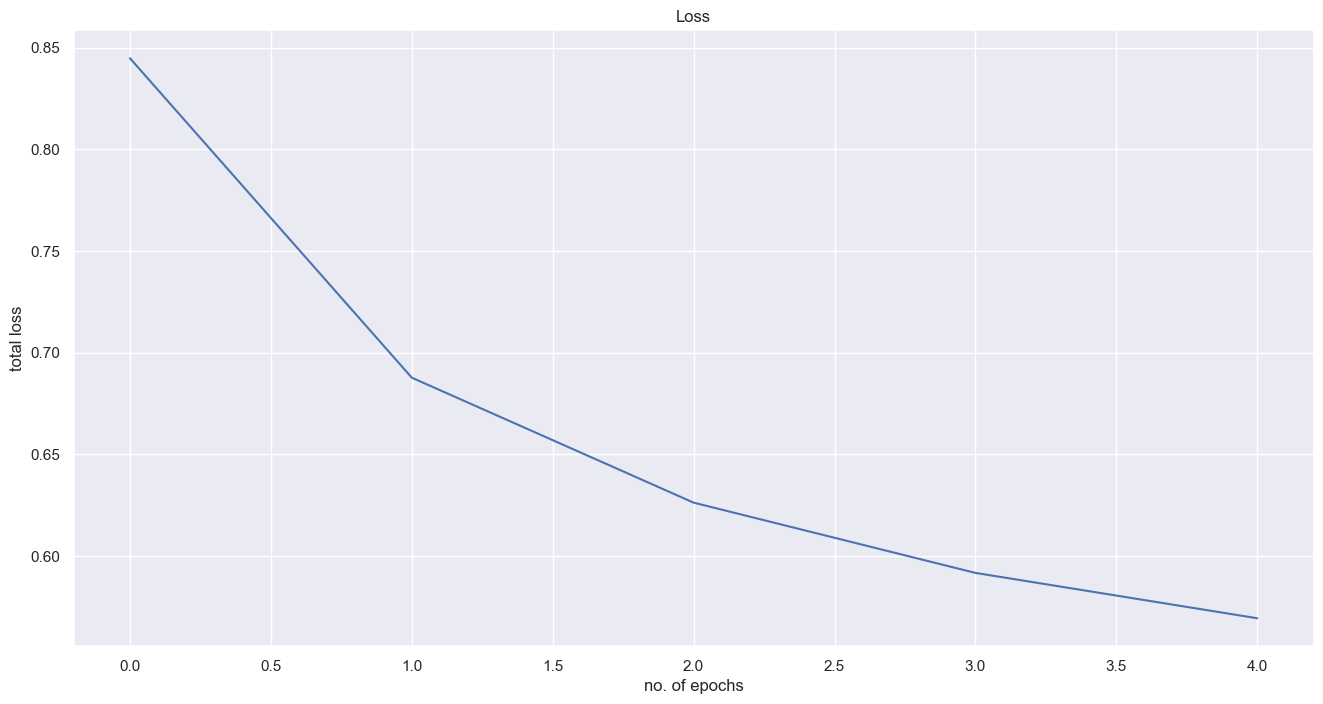

In [19]:
import matplotlib.pyplot as plt

plt.plot(loss_list)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

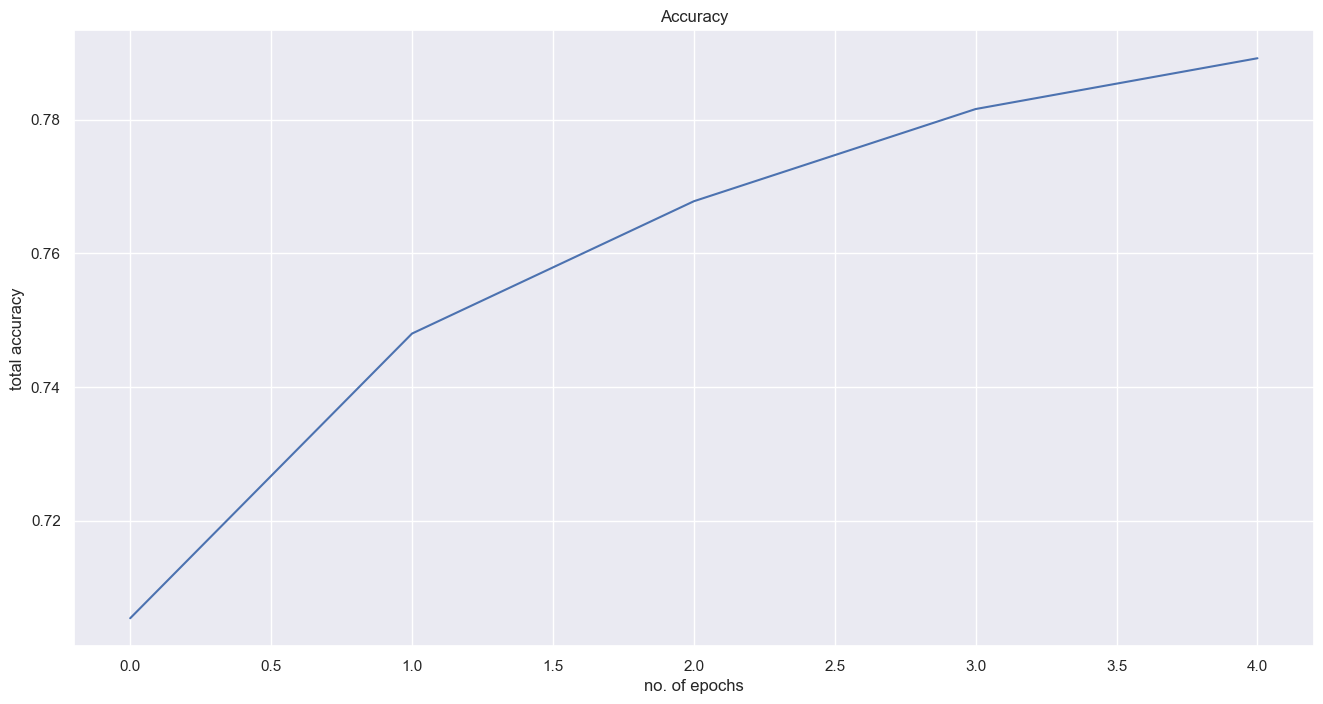

In [20]:
plt.plot(acc_list)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()

#### Saving Models

You'll want to save your models so you don't have to retrain each time!

A common way to save a model is to serialize the internal state dictionary (containing the model parameters).


In [21]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


#### Loading Models

The process for loading a model includes re-creating the model structure and loading the state dictionary into it.

In [23]:
# model = NeuralNetwork()
model = ConvNet()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

#### Make predictions!

In [45]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
x = torch.unsqueeze(x, dim=0)
# x = np.expand_dims(x, axis=0)
print(x.shape)
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

torch.Size([1, 1, 28, 28])
Predicted: "Ankle boot", Actual: "Ankle boot"


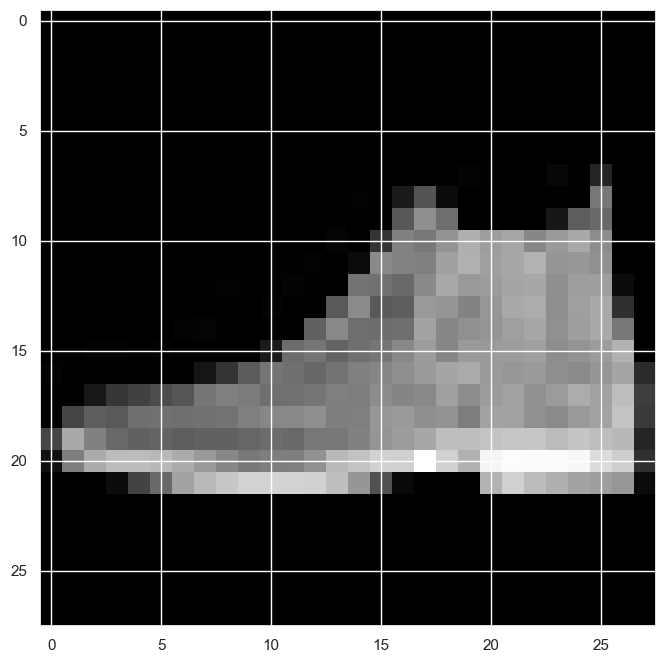

In [29]:
import matplotlib.pyplot as plt

img_ = test_data[0][0].numpy().reshape(28, 28)
plt.imshow(img_, cmap='gray')
plt.show()
